### Objective: Solve u_t + (u(1-u))_x = 0 for x,t \in [0,1]x[0,tmax] using upwind numerical scheme. Use initial condition u_0= 0.5+0.3*cos(2*pi*x) and periodic boundary conditions. t_max = 0.5 (analytically, we know shock formation occurs at time t~0.27

#### let delta_x = 0.001, hence we have 1001 grid points, with x_0=0 and x_1000 = 1, and generally x_n = n*0.001

#### In order to satisfy CFL condition, delta_t = delta_x^2/10 = 0.0001 and therefore total time steps = 0.5/0.0001 = 5,000 with t_0 = 0, t_5000 = 0.5

In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
tmax=0.5  #set maximum time
delta_x = 0.001 #spacial discretization fidelity

N = int(1/delta_x)   # have N=1/delta_x space steps, 0,...,N
delta_t = delta_x/10  
M = int(tmax/delta_t) #M time steps

def f(u):
    return u*(np.ones_like(u)-u)

u_initial = np.empty(N+1) #holds initial data

xvals = np.linspace(0,1,N+1) #holds x-values of grid points

u_initial = 0.3*np.cos(2*np.pi*xvals)+0.5

print(f'Using {N}, spacial grid points,  {M}, time steps')

Using 1000, spacial grid points,  5000, time steps


### Now we build the scheme by which u_n+1 is found from u_n.

In [97]:
u_hist = []  # u[i] stores approximate solution at time step i, or t=i*delta_t

u_now = np.copy(u_initial)  #store current solution

u_next = np.zeros_like(u_now) #will hold solution at next time step

for tstep in range(1,M):
    
    forward_points = np.array([u_now[i] for i in range(1, len(u_now))] + [u_now[0]])  # [u(x_1), u(x_2),...,u(x_N),u(x_0)]
    
    backward_points = np.array([u_now[-1]] + [u_now[i] for i in range(0, len(u_now)-1)])  #[u(x_N),u(x_0), u(x_1),...,u(x_N-1)]

    u_next = u_now-(delta_t/(2*delta_x))*(np.subtract(f(forward_points),f(backward_points))) #apply the scheme
    
    u_hist.append(u_now) #store soln at current time step
    
    u_now = u_next #move forward in time

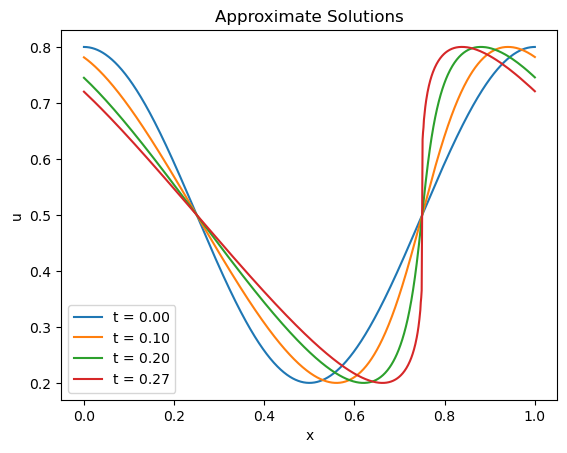

In [104]:
# Specify the time steps at which you want to plot
time_steps = [0.0, 0.1,  0.2, 0.27]

# Create a figure and axis
fig, ax = plt.subplots()

# Iterate through the specified time steps and plot the data
for t in time_steps:
    # Find the index corresponding to the closest time step in the uhist array
    tstep = int(t / delta_t)  # Assuming you have a time step size 'dt'

    # Plot the data at the current time step with label
    ax.plot(xvals, u_hist[tstep], label=f't = {t:.2f}')

# Add labels, legend, and other plot details
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_title('Approximate Solutions')
ax.legend()

# Show the plot
plt.show()

## We can see that the numerical solution blows up at t=0.27, as expected.